## ESTIMATION OF SAMPLE SIZE

In [2]:
import pandas as pd
import scipy.stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Relationship between sample size and error

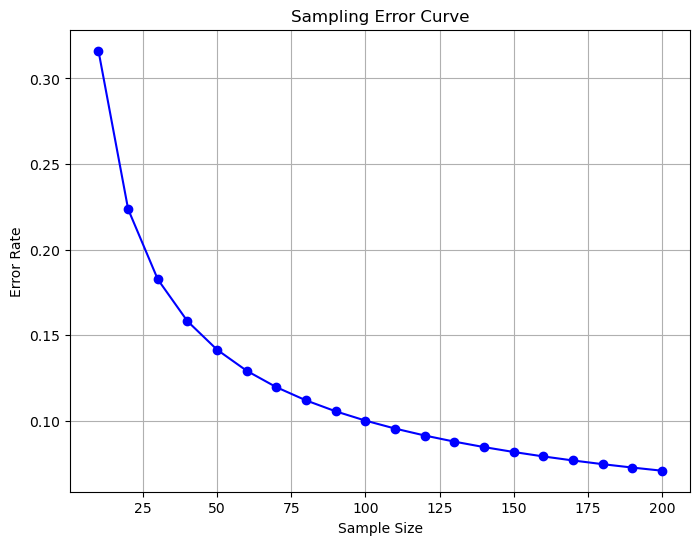

In [3]:
import matplotlib.pyplot as plt
import numpy as np


sample_sizes = np.arange(10, 210, 10)

# Define a function for the sampling error curve
def sampling_error_curve(sample_sizes):
    return 1 / np.sqrt(sample_sizes)

# Calculate error rates for different sample sizes
error_rates = sampling_error_curve(sample_sizes)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, error_rates, marker='o', linestyle='-', color='b')
plt.title('Sampling Error Curve')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

## Topic 1: Sample size formulae: One sample

n=(z*s/d)**2

where:

n = sample size

z = confidence interval in standard error units

s = standard error of the mean

d= acceptable magnitude of error

### Application:
Suppose a climate researcher is interested in estimating the average temperature in a region based on a sample dataset. The researcher collects temperature data at different locations and wants to test whether the average temperature is consistent with a certain value.

How much is sample size?


Given Information:

Population standard deviation (σ): Unknown, but for the purpose of the example, let's assume it is 5 degrees Celsius.
Desired confidence level (Z): 95%
Margin of error (d): 1.5 degrees Celsius
Sample data: Temperature readings in degrees Celsius from the provided dataset.

In [4]:
df = pd.read_csv("./Climate_change.csv")

In [5]:
import math

def calculate_sample_size(z, sigma, d):
    n = math.ceil((z * sigma / d) ** 2)
    return n


z_score = 1.96  # as alpha=0.05
population_std_dev = df['Temperature'].std()  
margin_of_error = 0.25 


sample_size = calculate_sample_size(z_score, population_std_dev, margin_of_error)

print(population_std_dev)
print(f"Required Sample Size (n): {sample_size}")

5.030615849173211
Required Sample Size (n): 1556


## Topic 2: Sample Size for a Proportion

n=(Z**2)(p)(1-p)/(E**2)

Where:

n = number of items in samples

Z =confidence interval in standard error units

p = estimated proportion of success

q = (1-p) or estimated the proportion of failures

E =maximum allowance for error between true

proportion and sample proportion, or zsp squared.

## Application: 
We want to estimate the proportion of locations experiencing sea level rise above a certain threshold. Let's assume you are interested in estimating the proportion of locations where sea level rise is greater than 0.5 units.


d: The accuracy of the estimate = 4% (0.04)

Z: For a 95% confidence level, Z=1.96

In [6]:
df = pd.read_csv("./Climate_change.csv")

In [7]:
d = 0.04  # Accuracy of the estimate
Z_alpha_over_2 = 1.96  # Z-score for a 95% confidence level

# Calculate the proportion of locations with sea level rise greater than 0.5
observed_proportion = (df['Sea Level Rise'] > 0.5).mean()

# Calculate sample size
n = math.ceil((Z_alpha_over_2**2 * observed_proportion * (1 - observed_proportion)) / (d**2))

print(f"Observed Proportion: {observed_proportion:.2%}")
print(f"Minimal Sample Size (n): {n}")

Observed Proportion: 30.92%
Minimal Sample Size (n): 513


## Sample Size for two-samples

## Application:
Let's create a hypothetical example using your dataset to estimate the difference in Sea Level Rise between two groups of locations. We will use the provided formula to calculate the required sample size for each group.

### H0:Mean of first group is equal to second group.

### H1:Mean of first group is not equal to second group.

Given values:


Significance level (α): 0.05

Power (1−β): 0.8 (implied β=0.2)

Difference to be detected (d):0.2

## Formulae:

n=4*(sigma**2)*((Z-alpha+Z-beta)**2)/(d**2)

In [8]:
import pandas as pd
import math
from scipy.stats import norm


sigma = df['Sea Level Rise'].std() 
alpha = 0.05 
beta = 0.2 
d = 0.2 

# Calculate Z_alpha and Z_beta
Z_alpha = abs(norm.ppf(alpha/2))
Z_beta = abs(norm.ppf(beta))

# Calculate sample size
n = math.ceil(((Z_alpha + Z_beta)**2 * 4 * sigma**2) / d**2)

print(sigma)
print(f"Minimal Sample Size per Group (n): {n}")


0.9913486683750293
Minimal Sample Size per Group (n): 772


## Two-sample proportions

H0: P1=P2

H1: Not Equal

N=n1+n2=4*((Z(1-alpha/2)+Z(1-beta))**2)*((p1+p2/2)((2-p1-p2)/2))/d**2


## Application:
Let's consider another column, such as "Temperature," and estimate the required sample size to determine if the difference in temperatures between two groups is significant.

### H0:Proportion of first group is equal to second group.

### H1:Proportion of first group is not equal to second group.

1st group:CO2 Emmissions more than 350

2nd group:CO2 Emmissions less than 350

Now,estimate the required sample size


In [21]:
import pandas as pd
import math


alpha = 0.05 
beta = 0.10 
Z_alpha_over_2 = 1.96 
Z_beta = 1.282 


temperature_group1 =df[df['CO2 Emissions'] <350]['Temperature'] 
temperature_group2 = df[df['CO2 Emissions'] >548]['Temperature'] 


average_temperature = (temperature_group1.mean() + temperature_group2.mean()) / 2
variance = ((temperature_group1.std()**2 + temperature_group2.std()**2)) / 2
sigma = math.sqrt(abs(average_temperature * (1 - average_temperature)))

critical_value = Z_alpha_over_2 + Z_beta


required_sample_size_per_group = 4*((critical_value**2) * variance) / ((temperature_group1.mean() - temperature_group2.mean())**2)

required_sample_size_per_group = math.ceil(required_sample_size_per_group)


print(f"Required Sample Size per Group: {required_sample_size_per_group}")

Required Sample Size per Group: 239
